# Machine Learning 0 - Introduction

In this lab, we will introduce the classification problem that we will be working on for the last three labs. The objectives of the lab are:

* Examine the dataset and prepare the basic pipeline that will be used in the next lab.
* Make sure that we use a correct methodology for comparing the algorithms
* Get used to working with the [scikit-learn](https://scikit-learn.org/stable/) library.

## Important note

For the machine learning labs, **each student must write a report** (one report for all labs together) which will be used during the oral exam. This report should highlight the different methods used during the labs, but also how you validated each method and compared their results.

## Introduction to the dataset

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset has been collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. It consists of 60.000 32x32 colour images, split in 10 classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.

*Reference: Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.* PDF available at https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

For the purpose of the INFO-H-501 laboratories, we will use a subset of those images by only taking 3 different classes: 'airplane', 'bird' and 'horse'.

[Click here to download](https://my.pcloud.com/publink/show?code=XZJUCPkZqiVxqtn8CXRB7D78YKt88RJvzWyk) the modified dataset. Extract the ZIP file and put the CIFAR10 folder in the same directory as the notebook.

The images are 32x32 8-bit **RGB**, and from these we extracted **Histogram of Gradient** vectors (16 orientations x 16 blocks = 256 values in HoG vector).

The following code pre-loads all of this data (make sure that you have the [lab_tools.py](https://github.com/odebeir/info-h-500-501/blob/master/LABS1/lab_tools.py) file in the same directory as the notebook, if you didn't clone the repository):

In [8]:
## On va travailler sur le même dataset pour les 4 labs : adapté de de CIFAR10, small images pour classifier entre 10 différentes classes.
## Ici on keep 3 classes : bird, airplaines et horse. et le but du modèle est de classifier ces images.
#small dataset, pour pas passer 50h à train.
## et donc ici cross validation, results, ... bref les bases.

## next lab : regader KNN, deciison tree, rf, svm, and NN. but comparer les méthodes et résultats et être sur comment les comparer.
#càd comment comparer méthode et dire que résultat meilleure et aussi quels sont les paramètres à utiliser !
#et caract de chaque méthode ! càd some classification need preprocessing (nromalzie, pca, ...) et donc bien comprendre pk on a besoin de preprcessing ou non
#BREF BIEN COMPRENDRE et expliquer à l'exam 
# report : different steps of methodoloy et résultats : et bien interpreter, et expliquer les résultats, comparer mthode, comment améliorer, ...

In [2]:
from lab_tools import CIFAR10, get_hog_image

Pre-loading training data
Pre-loading test data


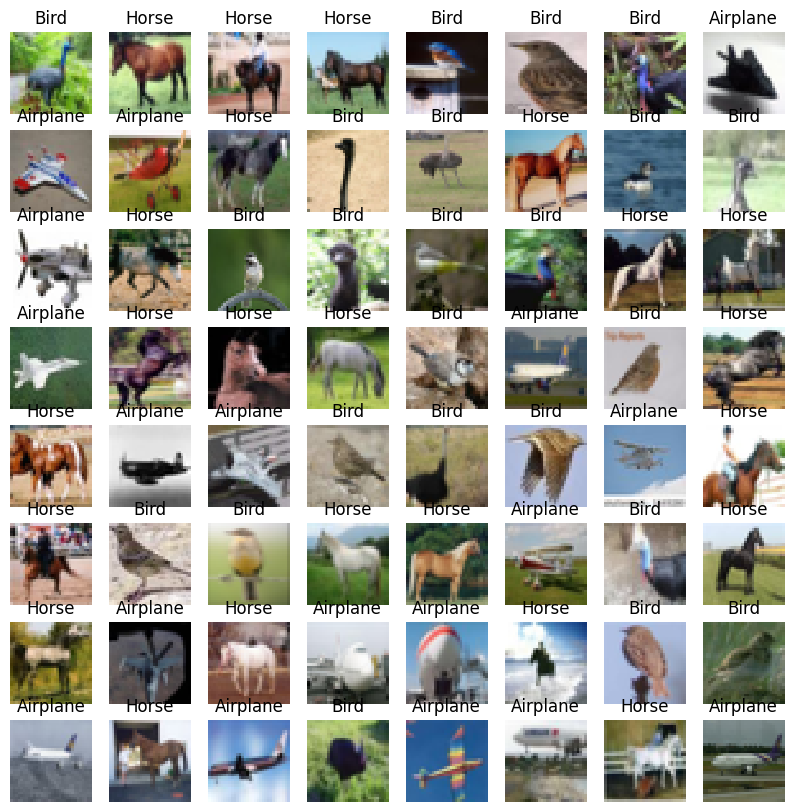

In [3]:
dataset = CIFAR10('CIFAR10/CIFAR10/')
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(dataset.train['images'][i].reshape((32,32,3)), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
plt.show()

We can also have a look at some HoG images:

Histogram of gradient : each image split in grid 4*4 and each cell e compute gradient (border) in different directions set on evalue gradient dans chaque dirrection. bref on évalue gradient dans différentes directinos. donc donne info sur les bords dans image. et donc chaque image résumé en 1 vecteurde 256 dimensions et ce vecteur sera use comme input dans méthode de classifcation. Mais bref ici on extract les features directement et on se focus sur les classifiers.

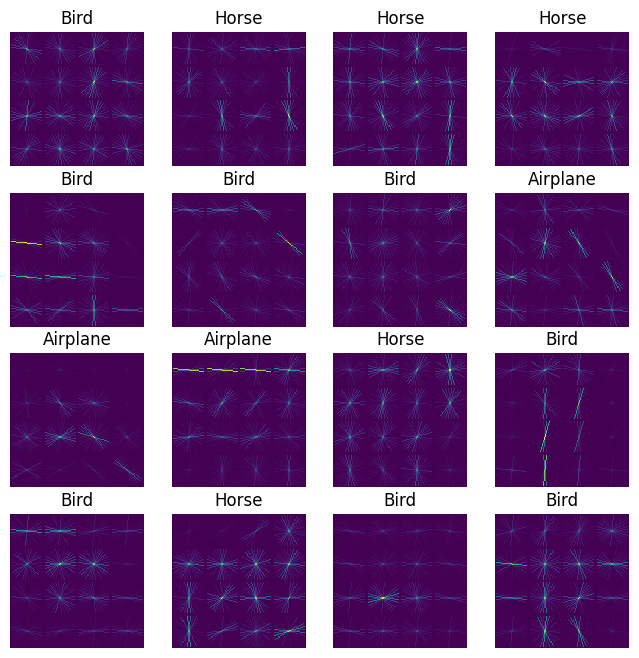

In [12]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    hog = dataset.train['hog'][i].reshape((4,4,16))
    plt.imshow(get_hog_image(hog, 128), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
plt.show()

Note that this is an "image" representation of the HoG, but that the actual data that we will be working on is a size 256 vector for each image. Our **feature space** has therefore 256 dimensions. 

## Exploring the dataset

The *dataset* object gives you access to different attributes:

* *dataset.path* contains the path to the CIFAR10 folder.
* *dataset.labels* contains the name of the three classes
* *dataset.train* and *dataset.test* are dictionaries containing three numpy arrays each:
    * *images* contains the RGB images
    * *hog* contains the HoG vectors
    * *labels* contains the label for each image

In [13]:
print(dataset.path)
print(dataset.labels)
print(dataset.train.keys())
print(dataset.train['hog'].shape)

CIFAR10/CIFAR10/
['Airplane', 'Bird', 'Horse']
dict_keys(['images', 'hog', 'labels'])
(15000, 256)


### Quick questions:

The dataset has already been split into a training set (dataset.train) and a test set (dataset.test).

* How many images are in the training set ?
* How many images are in the test set ?
* What is the class distribution of the dataset ?

Training set size: 15000
Test set size: 3000

Distribution des classes (training set):
Airplane: 5000 images
Bird: 5000 images
Horse: 5000 images

Distribution des classes (test set):
Airplane: 1000 images
Bird: 1000 images
Horse: 1000 images


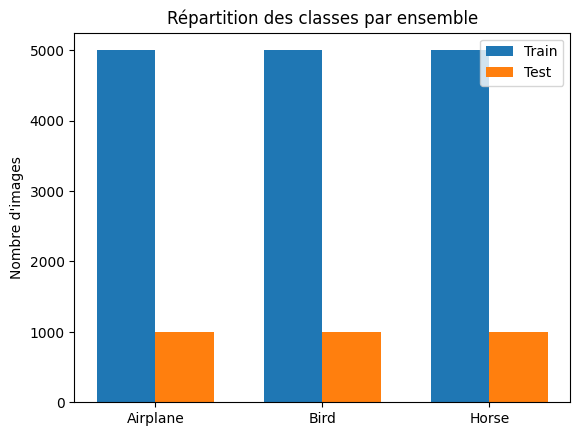

In [18]:
# Taille des ensembles
print("Training set size:", len(dataset.train['labels']))
print("Test set size:", len(dataset.test['labels']))

import numpy as np
import matplotlib.pyplot as plt

classes = dataset.labels

# Répartition dans le training set
train_labels = dataset.train['labels']
train_unique, train_counts = np.unique(train_labels, return_counts=True)

print("\nDistribution des classes (training set):")
for cls, count in zip(classes, train_counts):
    print(f"{cls}: {count} images")

# Répartition dans le test set
test_labels = dataset.test['labels']
test_unique, test_counts = np.unique(test_labels, return_counts=True)

print("\nDistribution des classes (test set):")
for cls, count in zip(classes, test_counts):
    print(f"{cls}: {count} images")

# Visualisation des deux répartitions
x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, train_counts, width, label='Train')
ax.bar(x + width/2, test_counts, width, label='Test')

ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylabel("Nombre d'images")
ax.set_title("Répartition des classes par ensemble")
ax.legend()

plt.show()



In [ ]:
### clean data set avec bonne répartition et bien équilibré
## que cherche t'on d'autre pour describe data set dans machine learing method ?
## bien checker distribution et range d'une classe à l'autre.
## imaginons on utilise KNN, problematic si la range des values est fort différente, et qu'on use euclidian distance : gner eimaginos une feature 
## va de 0 à 1 et d'autres de 0 à 1000. ça peut poser pb, mais decision tree non par exemple.

### Descriptive data analysis

Look at the HoG data from the training set. What are the characteristics of the dataset ? Do you think that some pre-processing may be required to help with the different algorithms ?

In [17]:

# -- Your code here -- #
import numpy as np
hog_data = dataset.train['hog']

print("Shape:", hog_data.shape)
print("Min:", np.min(hog_data))
print("Max:", np.max(hog_data))
print("Mean:", np.mean(hog_data))
print("Std dev:", np.std(hog_data))


Shape: (15000, 256)
Min: 0.0
Max: 0.2251452001705904
Mean: 0.003906249999884475
Std dev: 0.005722073863398175


(256,)


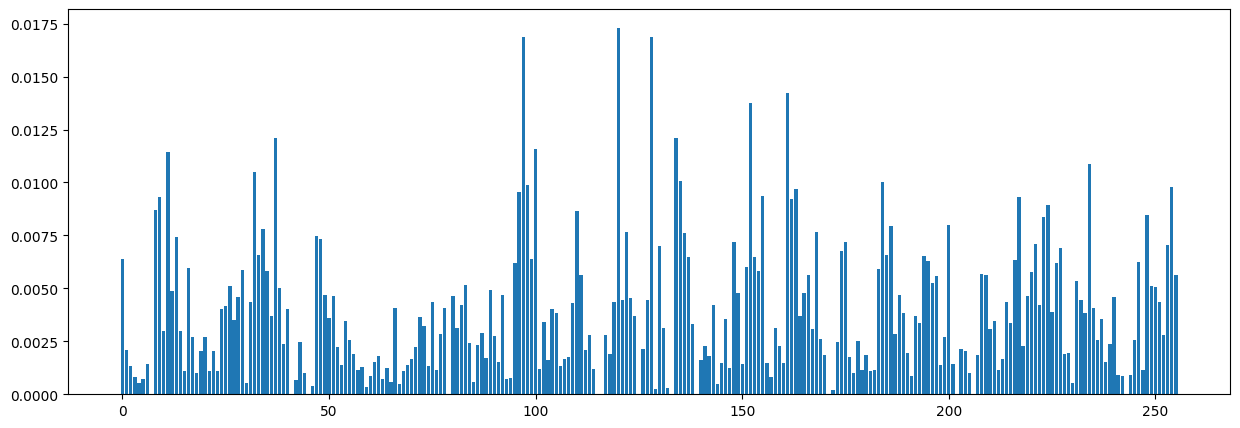

In [19]:
print(dataset.train['hog'][0].shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.bar(range(256), dataset.train['hog'][0])
plt.show()


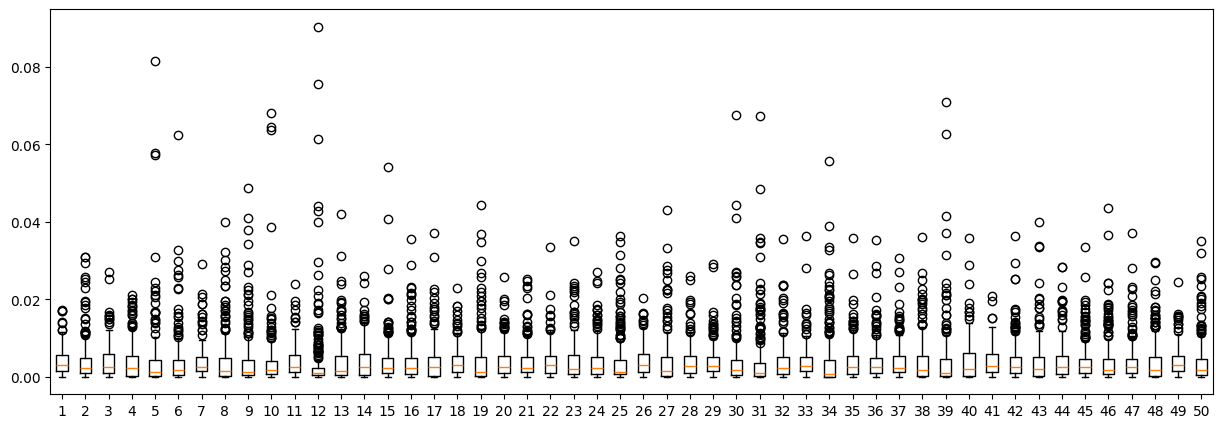

In [20]:
plt.figure(figsize=(15,5))
plt.boxplot(dataset.train['hog'][:50].T)
plt.show()


In [21]:
## Similar distribution et range value donc easy scneario pour chaque classifier (pas de pb de range et distributiion) parce que bonne
## données, équilibrés, ...

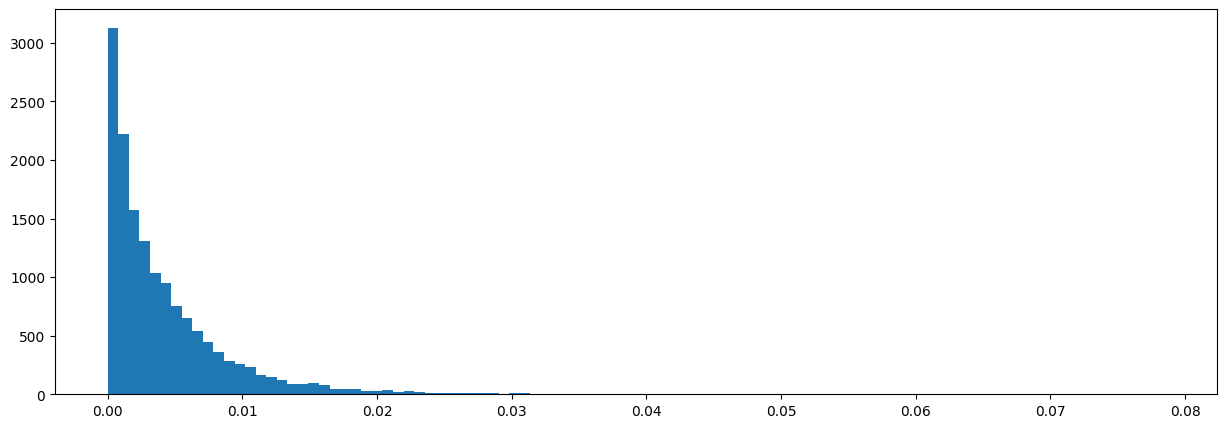

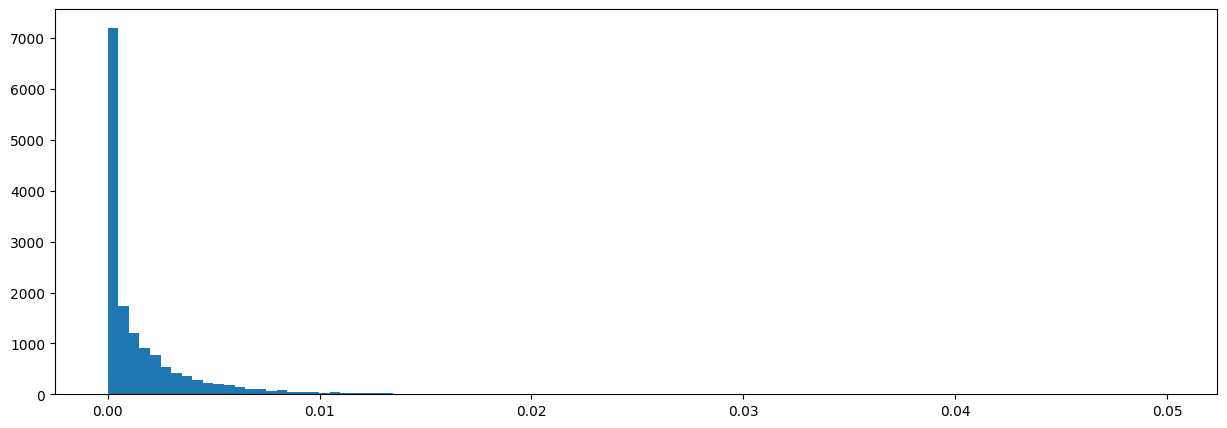

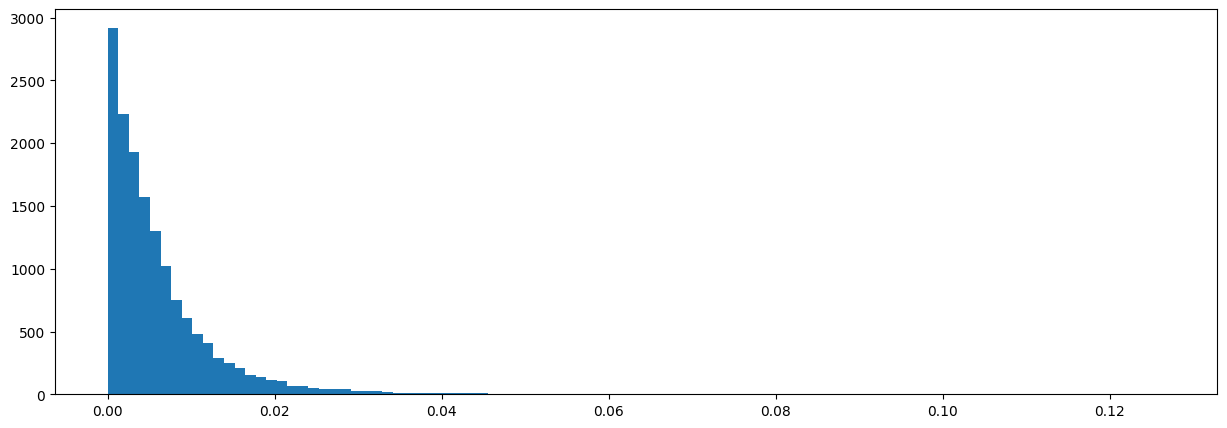

In [22]:
plt.figure(figsize=(15,5))
plt.hist(dataset.train['hog'][:, 0], bins=100)

plt.figure(figsize=(15,5))
plt.hist(dataset.train['hog'][:, 50], bins=100)

plt.figure(figsize=(15,5))
plt.hist(dataset.train['hog'][:, 150], bins=100)

plt.show()


In [ ]:
###il faut ausis regarder corrélatino entre les dimensions/features : si très corrélé, je epux faire réduction de dim qui peut 
## être impo pour certains modèles de classification
#d'autres modèles comme decision tree : select the features important/non redondant but KNN par exemple, on veut pas trop de dim qui ne 
## donne pas bcp d'infos car ça va faire du bruit

##pas oublier pour le projet !!

*** Bien faire attention training et testing : training : divisier en training et valdiation, pour bien tune les hyperparam et ensuite à la fin testing ***

## Introduction to scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) is a very well documented machine learning library in Python. It contains many algorithms for [classification](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning), and makes the whole process of building a machine learning pipeline relatively straightforward. There are many examples in the documentation, as well as relatively complete theoretical explanations, so I really encourage you to take the time to read it if some things are not clear.

Let's make a very simple example. We are going to use the [Ridge Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier), which is a very basic linear model.

In [24]:
from sklearn.linear_model import RidgeClassifier

To use a classifier with scikit-image, we generally have three steps:

* Create an instance of the class of the classifier (here: RidgeClassifier). The constructor will generally contain many arguments that can be modified, and that are explained in the documentation. There will also generally be default values for all of them, so in this simple example we will just use those:

In [25]:
clf = RidgeClassifier()

* Use the *fit* method with, as arguments, the training data (in our case, the HoG vectors) and the corresponding labels. This will start the main training algorithm, trying to fit the parameters of the classifier with the training data:

In [26]:
clf.fit(dataset.train['hog'], dataset.train['labels'])

RidgeClassifier()

* Use the *predict* method to get the prediction of the classifier on the data given as argument. In this case, we get the predictions on the data that was just used for training. **What kind of performance will that give us?**

In [27]:
pred = clf.predict(dataset.train['hog'])
print(pred.shape)

(15000,)


We can then evaluate those predictions. Scikit-learn provides many different [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) for evaluating the performances of a classifier. The most simple of those is the accuracy, which is simply the number of correct predictions divided by the total number of predictions:

In [28]:
from sklearn.metrics import accuracy_score

score = accuracy_score(dataset.train['labels'], pred)
print(score)

# Not that it's fairly easy to compute that score "by hand":
T = (pred==dataset.train['labels']).sum()
print(T, len(pred), T/len(pred))

0.7356666666666667
11035 15000 0.7356666666666667


In a balance dataset, accuraccy bien. mais sinon pas bonne

In a multiclass problem, it's often also very useful to look at the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix), which gives us more information on which classes are often mistaken for each other:

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(dataset.train['labels'], pred)
print(cm)

[[3812  740  448]
 [ 742 3236 1022]
 [ 337  676 3987]]


Note that the rows represent the **true labels** and the columns the **predicted labels**. So this mean that, in this case, out of the 5000 images of class 0 ("Airplane"), 3812 were correctly classified, 740 were classified as "Bird" and 448 as "Horse").

### Quick question

* Modify the code to estimate the **predictive** performance of the algorithm (without using the test set).

In [10]:

# -- Your code here -- #
# 1. Fraction de données pour validation
p_val = 0.1
n_val = int(p_val * len(dataset.train['hog']))
print(n_val)

# 2. Séparation du jeu d'entraînement et de validation
train_X = dataset.train['hog'][:-n_val]
train_Y = dataset.train['labels'][:-n_val]

val_X = dataset.train['hog'][-n_val:]
val_Y = dataset.train['labels'][-n_val:]

print(train_X.shape, train_Y.shape, val_X.shape, val_Y.shape)

1500
(13500, 256) (13500,) (1500, 256) (1500,)


In [31]:
# 3. Modèle RidgeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

clf = RidgeClassifier(alpha=0.1)
clf.fit(train_X, train_Y)

# 4. Prédiction sur le jeu de validation
pred = clf.predict(val_X)

# 5. Score descriptif (sur train)
pred_descr = clf.predict(train_X)
score = accuracy_score(train_Y, pred_descr)
print(f"Descriptive: {score:.3f}")

# 6. Score prédictif (sur validation)
score = accuracy_score(val_Y, pred)
print(f"Predictive: {score:.3f}")

# 7. Matrice de confusion
cm = confusion_matrix(val_Y, pred)
print(cm)

print(cm.sum(axis=1))

Descriptive: 0.756
Predictive: 0.742
[[405  65  42]
 [ 67 330  93]
 [ 34  86 378]]
[512 490 498]


In [38]:
## almost balanced pour valdiation test : mais ici pcq c'est bien split, norlakeent, faut randomyl sample through the example et avoir validation equilibre.
## et en gros (Stratified)KFold the sckit learn permet d'avoir validation test avec disitrbution la plus proche de training.
#mais NB : on peut avoir chance ou non d'avoir pris des validation dur ou non. DONC ce qu'on fait c'est CV. et pour ça on use soit:
## (Stratified)KFold ou bien cross_val_score
## bien faire attention à méthode de score (accurcary, le nombre de fold, ...)
##NB : quandon comapre des classifier, peut être intéressant d'vavoir exactement même training et testing entre eux pour bien les comparer.
## bref réceouter si jamais

## Si modle ont  perforance équivalente : on va vers modèle les plus simples (moins de risk overfit), plus petit sd entre les différnts split (more stable)
## et aussi moins de temps

## How can we find the "best" algorithm?

What we have shown above served to illustrate how scikit-learn classifiers work, but we now have to build a valid machine learning pipeline to compare the different algorithms that we will use in the next labs.

As we have said earlier, we have already split the dataset into a "training" and a "test" set. It is clear that the final evaluation should take place on the test set.

But in addition to comparing the algorithms between each other, we also have to find the best "hyper-parameters" for each algorithm. For example, in our RidgeClassifier example, there is a regularization parameters, *alpha*, which by default was set to 1.0. Can we improve the performance of the algorithm by modifying this parameter ?

### Side-note: parameter vs hyper-parameter

In general, when talking about machine learning models, **parameters** are what the algorithm learns with the data (if we are for instance learning a linear regression y = ax+b, the "parameters" would be a and b), while **hyper-parameters** are modifiers to the model or to the pipeline (for instance, if we are generalizing to a polynomial regression, the degree of the polynome would be an hyper-parameter).

### Cross-validation

The most common way of finding the best hyper-parameters of a classifier is to use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html).

* Using the [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) method from scikit-learn, find the best *alpha* hyper-parameter for the RidgeClassifier: 

In [ ]:

# -- Your code here -- #


### Comparing algorithms

Once you have found the best hyper-parameters for an algorithm, you can re-train the classifier on the whole training set, and finally use the test set to get a "final performance". 

* How can you then decide which of the classifiers is best ?
* How can you decide if the different between two classifiers is significant ?

Try to compare the best RidgeClassifier with the original. Is it significantly better?

In [ ]:

# -- Your code here -- #
